<a href="https://colab.research.google.com/github/Quratulain786/-R-versus-Python-EDA/blob/main/Copy_of_Titanic_data_Analysis(ML_Workshop).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part 2: Hands-on ML Training (75 mins)

# Step 1: Setting Up the Environment (5 mins)
# Installing required libraries (Run this in Google Colab)
!pip install numpy pandas scikit-learn matplotlib seaborn

Step 1: Setting Up the Environment (5 mins)
Installs required libraries (numpy, pandas, scikit-learn, matplotlib, seaborn).
Imports necessary libraries for data handling, preprocessing, modeling, and visualization.


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Step 2: Exploratory Data Analysis (EDA) (15 mins)**
Loads the Titanic dataset from an online source.
Displays dataset preview & info (column names, data types, missing values).
Handles missing values:
Age is filled with the median.
Embarked is filled with the mode (most frequent value).
Drops irrelevant columns (Cabin, Ticket, Name).
Visualizes survival count & age distribution using Seaborn & Matplotlib.

In [ ]:
# Step 2: Exploratory Data Analysis (EDA) (15 mins)
# Loading the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [ ]:
# Understanding the dataset
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [ ]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


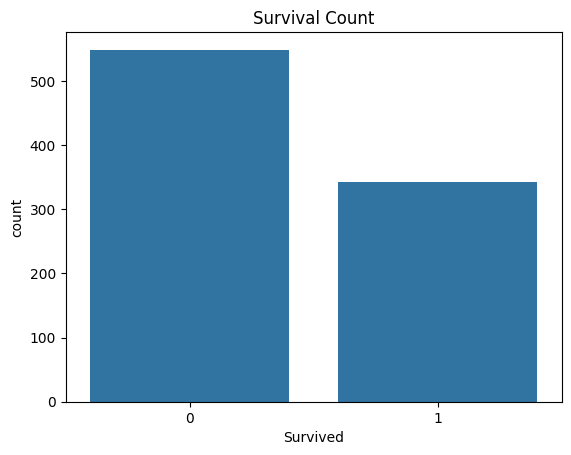

In [ ]:
# Visualizing survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

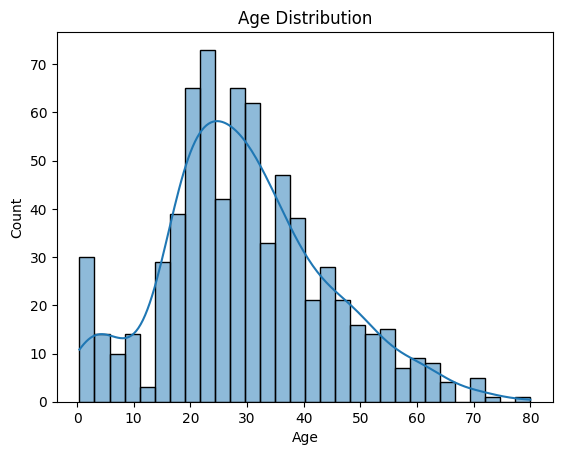

In [ ]:
# Visualizing age distribution
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
# Handling missing values (Impute missing Age values with median)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Dropping irrelevant features

<ipython-input-39-3a478992b139>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-39-3a478992b139>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Step 3: Feature Engineering & Data Preprocessing (15 mins)
Encodes categorical variables (sex & embarkation) using one-hot encoding.
Splits dataset into features (X) and target (y).
Splits data into training (80%) and testing (20%) using train_test_split.
Scales features using StandardScaler (important for models like Logistic Regression & k-NN).

In [ ]:
#Why We Use Feature Engineering & Data Preprocessing (Step 3)?
#Feature engineering and data preprocessing are critical steps in machine learning because raw data is
#often not ready for model training. In the Titanic dataset, we have both numerical and categorical features,
# and some of them need to be transformed before they can be used in machine learning models.

# Step 3: Feature Engineering & Data Preprocessing (15 mins)
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:

# Splitting data into features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 4: Building Machine Learning Models (25 mins)
Supervised Learning Models:
Logistic Regression
Decision Tree
Random Forest
k-Nearest Neighbors (k-NN)
Evaluates models using:
Accuracy
Classification Report (Precision, Recall, F1-score)
Confusion Matrix (visualized with a heatmap)
Unsupervised Learning Models (Quick Demo):
k-Means Clustering (finds 2 clusters in the dataset).
PCA (Principal Component Analysis) reduces dataset dimensions and plots a 2D visualization.
Why Do We Use Feature Scaling?
Feature scaling is a crucial preprocessing step in machine learning, especially for models that depend on distances or gradients. The Titanic dataset contains features with different ranges, such as:

Age: typically between 0 and 80.
Fare: can go from a few dollars to over 500.
Pclass: categorical values 1, 2, 3.
Since these features have different scales, some models might be biased toward features with larger values (e.g., Fare). Feature scaling standardizes these values to ensure that all features contribute equally to the model.
When Do We Need Feature Scaling?
✔ Required for models that use distance-based calculations:

Logistic Regression
k-Nearest Neighbors (k-NN)
Support Vector Machines (SVM)
Principal Component Analysis (PCA)
k-Means Clustering
❌ Not strictly needed for tree-based models:

Decision Trees
Random Forests
Gradient Boosting Models (XGBoost, LightGBM)
These models are not affected by feature magnitudes because they split data based on conditions rather than distances.
🚀 Key Benefits of Feature Scaling
✅ Prevents bias toward larger-scale features
✅ Helps distance-based models perform better
✅ Improves gradient descent convergence in optimization-based models


Logistic Regression Performance:
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



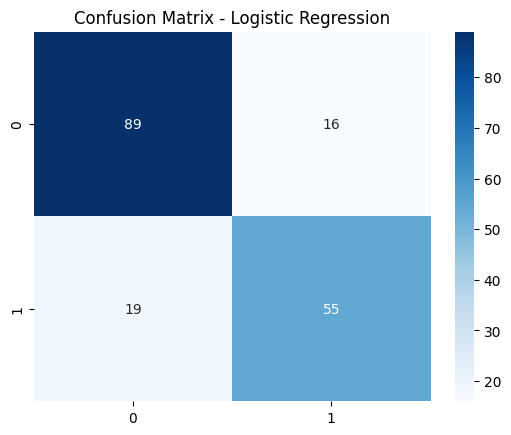


Decision Tree Performance:
Accuracy: 0.7374301675977654
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       105
           1       0.68      0.68      0.68        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



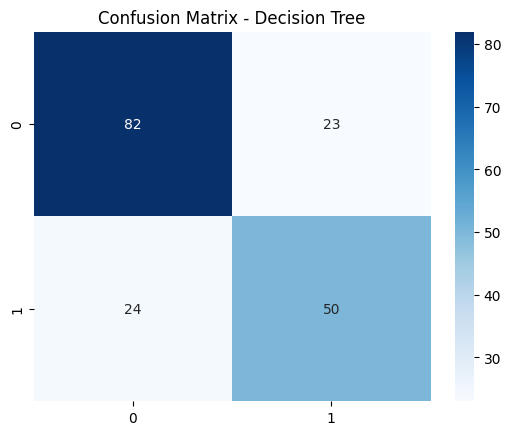


Random Forest Performance:
Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



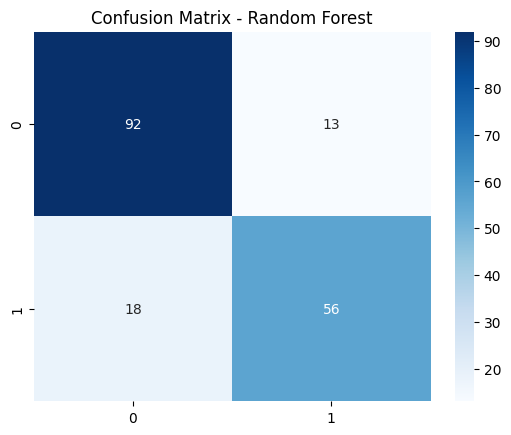


k-NN Performance:
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



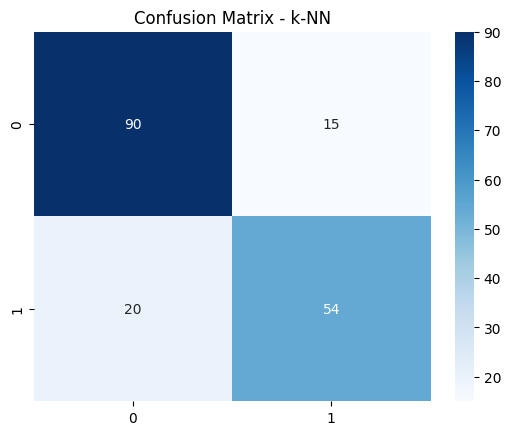

In [ ]:
# Step 4: Building Machine Learning Models (25 mins)
# 1. Supervised Learning Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-NN": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [ ]:
# 2. Unsupervised Learning Models (Quick Demo)
# k-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
print("\nk-Means Clustering Labels:", np.unique(kmeans_labels))


k-Means Clustering Labels: [0 1]


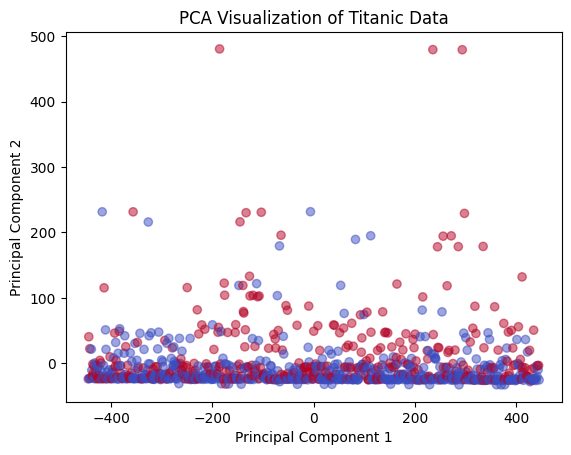

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title('PCA Visualization of Titanic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Step 5: Hyperparameter Tuning & Model Optimization (10 mins)
Grid Search vs. Random Search:
GridSearchCV: Tries all combinations of parameters.
RandomizedSearchCV: Randomly samples a subset of parameter combinations.
Optimizes Random Forest Classifier using different hyperparameters.
Feature Importance Analysis:
Identifies the most important features in predicting survival.
Visualizes feature importance using a bar plot.
Cross-validation:
Uses cross_val_score with 5-fold cross-validation to check model stability.
1️⃣ Why Do We Need Hyperparameter Tuning?
Machine learning models have hyperparameters that control how they learn.
Good hyperparameter values improve model performance, generalization, and efficiency.
Bad hyperparameters can lead to overfitting (too complex) or underfitting (too simple).
For example:

Random Forest Classifier has hyperparameters like:
n_estimators → Number of decision trees
max_depth → Maximum depth of each tree
min_samples_split → Minimum samples needed to split a node
Instead of choosing random values, we optimize them.

In [ ]:
# Step 5: Hyperparameter Tuning & Model Optimization (10 mins)
# Grid Search vs Random Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("\nBest Parameters from Grid Search:", grid_search.best_params_)


Best Parameters from Grid Search: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search.fit(X_train, y_train)
print("\nBest Parameters from Random Search:", random_search.best_params_)


Best Parameters from Random Search: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}


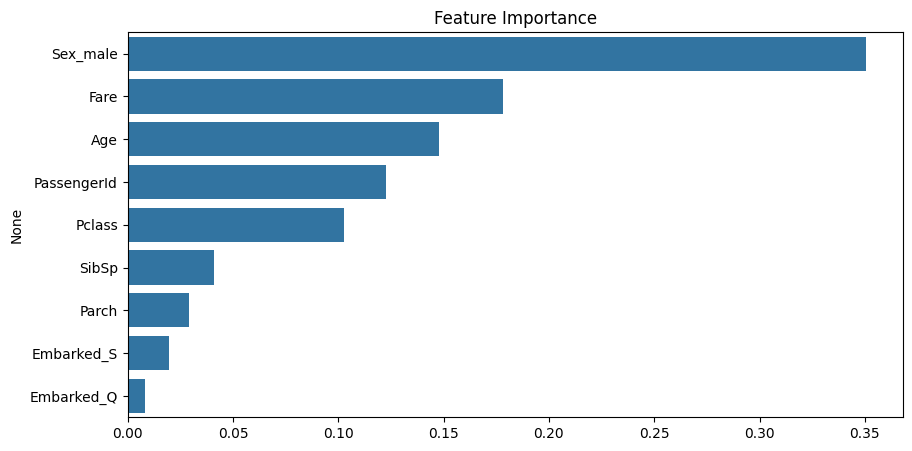

In [ ]:
# Feature Importance Analysis
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx])
plt.title('Feature Importance')
plt.show()

4️⃣ Cross-Validation Techniques
We split the training data multiple times to ensure model stability.
5-fold Cross-Validation:
Splits training data into 5 parts.
Trains the model 5 times (each fold used once as validation).
Averages accuracy across all 5 runs.
🚀 Key Takeaways
✅ Hyperparameter tuning improves model performance
✅ Grid Search (exhaustive) vs. Random Search (faster, but less precise)
✅ Feature importance helps interpret the model
✅ Cross-validation ensures stability

In [ ]:
# Cross-validation techniques
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))



Cross-validation Accuracy Scores: [0.83916084 0.84615385 0.82394366 0.77464789 0.83098592]
Mean CV Accuracy: 0.8229784300206836
